In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np

# 모델 선택 및 평가 관련 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# 전처리: 범주형 인코딩, 결측치 대체, 스케일링
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/open/train.csv').drop(columns=['ID'])
test = pd.read_csv('/content/drive/MyDrive/open/test.csv').drop(columns=['ID'])

# 제거할 피처 리스트
features_to_remove = [
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

# 해당 피처들 제거
train = train.drop(columns=features_to_remove, errors='ignore')
test = test.drop(columns=features_to_remove, errors='ignore')

# 타겟(입신 성공 여부) 분리 + 결측치 제거
y = train['임신 성공 여부']  # 타겟 변수 분리
x = train.drop(columns=['임신 성공 여부'])  # 입력 변수(x) 정의

# x에서 y의 결측치가 있는 행 제거
x = x.loc[y.dropna().index]
y = y.dropna()  # y에서도 결측치 제거

# 범주형 컬럼 전체 정의 (제거한 피처 제외)
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부"
]

# 범주형 컬럼을 문자열(str)로 변환
for col in categorical_columns:
    if col in x.columns:  # 컬럼이 존재하는지 확인
        x.loc[:, col] = x[col].astype(str)
        test.loc[:, col] = test[col].astype(str)

# 수치형 컬럼 전체 정의
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

# train 데이터를 train/val로 분할
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# 범주형 변수 인코딩
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_enc = x_train.copy()
x_train_enc[categorical_columns] = ordinal_encoder.fit_transform(x_train_enc[categorical_columns])

x_val_enc = x_val.copy()
x_val_enc[categorical_columns] = ordinal_encoder.transform(x_val_enc[categorical_columns])

# 수치형 변수 결측치 대체 (중앙값 사용)
imputer = SimpleImputer(strategy='median')
x_train_enc[numeric_columns] = imputer.fit_transform(x_train_enc[numeric_columns])
x_val_enc[numeric_columns] = imputer.transform(x_val_enc[numeric_columns])

# catboost 패키지 설치


<ipython-input-3-ee6d57ba6c74>:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '0' '1' ... '1' '1' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[:, col] = x[col].astype(str)
<ipython-input-3-ee6d57ba6c74>:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '0' '0' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[:, col] = test[col].astype(str)
<ipython-input-3-ee6d57ba6c74>:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.0' '0.0' '0.0' ... '0.0' '0.0' '0.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:, col] = x[col].astype(str)
<ipython-input-3-ee6d57ba6c74>:90: FutureWarning: Settin

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

# CatBoost 모델 설정
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=10,
    random_seed=100,
    loss_function='Logloss',
    verbose=10,
    #eval_metric= Binary f1_score,
    scale_pos_weight=3,
    one_hot_max_size=1
)

# 모델 학습 (early_stopping 적용)
cat_model.fit(
    x_train_enc, y_train,
    eval_set=[(x_val_enc, y_val)],
    early_stopping_rounds=10
)

# 검증 데이터 ROC-AUC 평가
val_pred_proba = cat_model.predict_proba(x_val_enc)[:, 1]
val_roc_auc = roc_auc_score(y_val, val_pred_proba)
print("cat Validation ROC-AUC:", val_roc_auc)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
0:	learn: 0.6892380	test: 0.6893139	best: 0.6893139 (0)	total: 243ms	remaining: 4m 2s
10:	learn: 0.6574423	test: 0.6580201	best: 0.6580201 (10)	total: 2.24s	remaining: 3m 21s
20:	learn: 0.6357826	test: 0.6368037	best: 0.6368037 (20)	total: 5.75s	remaining: 4m 28s
30:	learn: 0.6211311	test: 0.6226079	best: 0.6226079 (30)	total: 7.96s	remaining: 4m 8s
40:	learn: 0.6110687	test: 0.6129460	best: 0.6129460 (40)	total: 9.93s	remaining: 3m 52s
50:	learn: 0.6045235	test: 0.6067215	best: 0.6067215 (50)	total: 11.8s	remaining: 3m 40s
60:	learn: 0.5991654	test: 0.6016484	best: 0.6016484 (60)	total: 13.8s	remaining: 3m 32s
70:	learn: 0.5950340	test: 0.5978000	best: 0.5978000 (70)	total: 15.8s	remaining: 3m 26s
80:	learn: 0.5915097	test: 0.5945479	best: 0.5945479 (80)	total: 18.9s	remaining: 3m 34s
90:	learn: 0.5889303	test: 0.5922708	best: 0.5922708 (90)	total: 21.6s	remaining: 3m 35s
100:	learn: 0.5863874	test: 0.590005

In [ ]:

# 전체 학습 데이터 전처리 적용
x_full_enc = x.copy()
x_full_enc[categorical_columns] = ordinal_encoder.transform(x_full_enc[categorical_columns])
x_full_enc[numeric_columns] = imputer.transform(x_full_enc[numeric_columns])

# 최종 CatBoost 모델 (단, early stopping 없이 기본 iterations 사용)
model_full = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=10,
    random_seed=100,
    loss_function='Logloss',
    verbose=10,
    #eval_metric= Binary f1_score,
    scale_pos_weight=3,
    one_hot_max_size=1
)

model_full.fit(x_full_enc, y)


0:	learn: 0.6892888	total: 510ms	remaining: 8m 29s
10:	learn: 0.6579272	total: 7.46s	remaining: 11m 10s
20:	learn: 0.6363486	total: 13s	remaining: 10m 5s
30:	learn: 0.6215435	total: 19.2s	remaining: 10m
40:	learn: 0.6116332	total: 22.9s	remaining: 8m 56s
50:	learn: 0.6045307	total: 25.3s	remaining: 7m 51s
60:	learn: 0.5990568	total: 27.7s	remaining: 7m 6s
70:	learn: 0.5950853	total: 30.1s	remaining: 6m 33s
80:	learn: 0.5913510	total: 33.3s	remaining: 6m 18s
90:	learn: 0.5884733	total: 36.8s	remaining: 6m 7s
100:	learn: 0.5864150	total: 39.1s	remaining: 5m 48s
110:	learn: 0.5845099	total: 41.5s	remaining: 5m 32s
120:	learn: 0.5829873	total: 43.9s	remaining: 5m 18s
130:	learn: 0.5816046	total: 46.7s	remaining: 5m 9s
140:	learn: 0.5803936	total: 50.6s	remaining: 5m 8s
150:	learn: 0.5793939	total: 52.9s	remaining: 4m 57s
160:	learn: 0.5784377	total: 55.4s	remaining: 4m 48s
170:	learn: 0.5776499	total: 57.7s	remaining: 4m 39s
180:	learn: 0.5768995	total: 1m	remaining: 4m 33s
190:	learn: 0.5

In [ ]:

# 테스트 데이터 전처리 및 예측
x_test_enc = test.copy()
x_test_enc[categorical_columns] = ordinal_encoder.transform(x_test_enc[categorical_columns])
x_test_enc[numeric_columns] = imputer.transform(x_test_enc[numeric_columns])
test_pred_proba = model_full.predict_proba(x_test_enc)[:, 1]

# 제출 파일 생성
sample_submission = pd.read_csv('/content/drive/MyDrive/open/sample_submission.csv')
sample_submission['probability'] = test_pred_proba
sample_submission.to_csv('./0222.3_cat_features_removed.csv', index=False)
print("Finish! Submission file saved as 0222.3_cat_features_removed.csv")

Finish! Submission file saved as 0222.3_cat_features_removed.csv


피처 중요도가 fertility_feature_importance.xlsx으로 저장되었습니다.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124935 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0

<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b1e7857dc700>:104: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

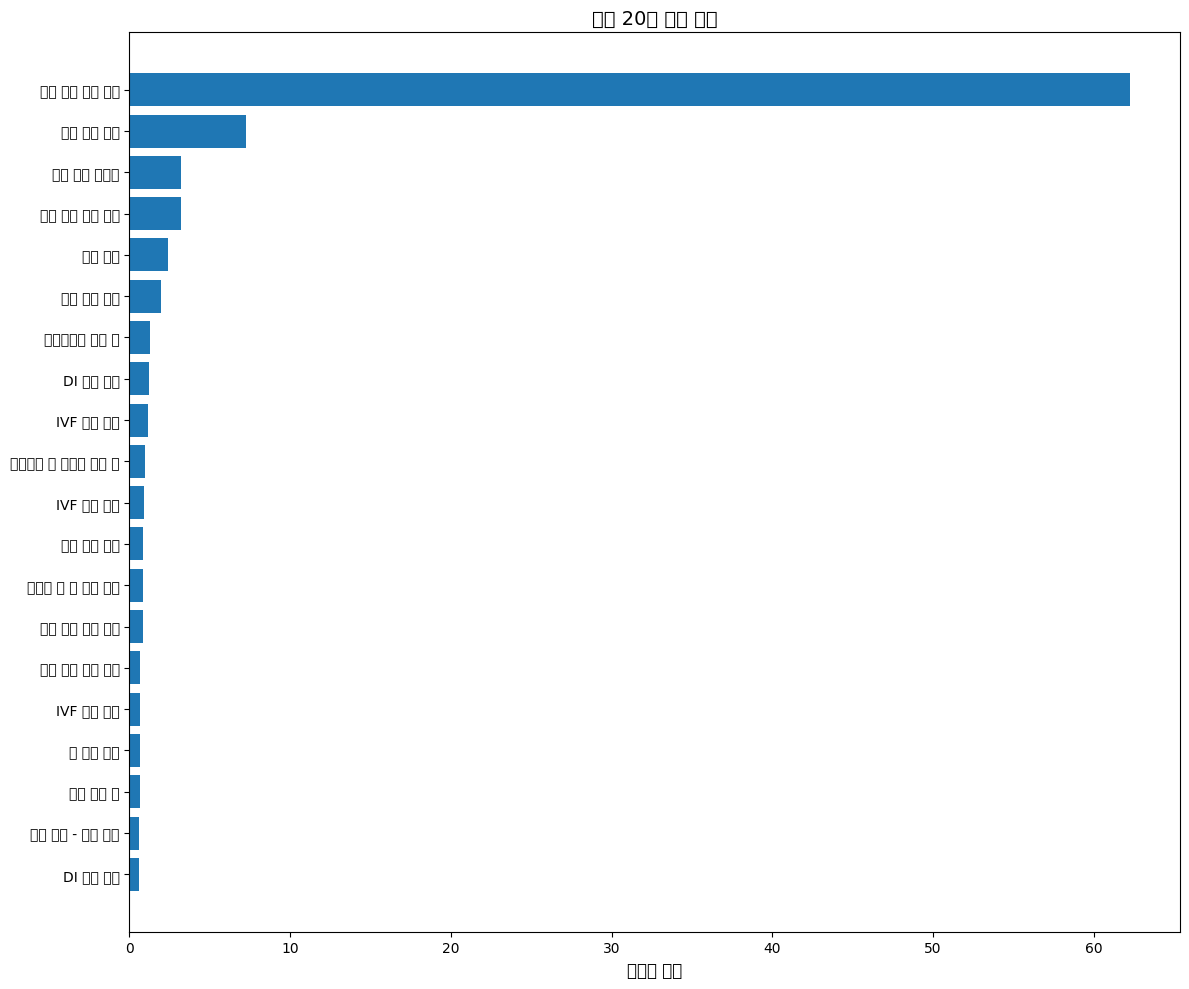


상위 10개 중요 피처:
                피처        중요도  상대적 중요도(%)  누적 중요도(%)
0      동결 배아 사용 여부  62.248278      100.00      62.25
1         시술 당시 나이   7.237925       11.63      69.49
2        배아 이식 경과일   3.232854        5.19      72.72
3      기증 배아 사용 여부   3.189636        5.12      75.91
4            정자 출처   2.413356        3.88      78.32
5         시술 시기 코드   1.938093        3.11      80.26
6       미세주입된 난자 수   1.292310        2.08      81.55
7         DI 시술 횟수   1.208826        1.94      82.76
8        IVF 시술 횟수   1.142346        1.84      83.90
9  미세주입 후 저장된 배아 수   0.991082        1.59      84.89


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 함수
def set_korean_font():
    """
    matplotlib에서 한글 폰트를 사용할 수 있도록 설정합니다.
    """
    # 코랩 환경인 경우 나눔폰트 설치
    import sys
    if 'google.colab' in sys.modules:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq
        !fc-cache -fv
        plt.rc('font', family='NanumGothic')
    else:
        # 로컬 환경에서는 시스템에 설치된 한글 폰트 찾기
        # Windows의 경우
        if sys.platform == 'win32':
            font_list = [font for font in fm.findSystemFonts() if 'Gothic' in font or 'Malgun' in font]
            if font_list:
                plt.rc('font', family='Malgun Gothic')
            else:
                print("한글 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.")
        # macOS의 경우
        elif sys.platform == 'darwin':
            plt.rc('font', family='AppleGothic')
        # Linux의 경우
        else:
            plt.rc('font', family='NanumGothic')

    # 글꼴 설정
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 모델 피처 중요도 추출 및 엑셀로 저장하는 코드
def export_feature_importance(model, feature_names, file_name="feature_importance.xlsx"):
    """
    CatBoost 모델의 피처 중요도를 추출하고 엑셀 파일로 저장합니다.

    Parameters:
    model: 학습된 CatBoost 모델
    feature_names: 피처 이름 리스트
    file_name: 저장할 엑셀 파일명
    """
    # 피처 중요도 추출
    importance_gain = model.get_feature_importance()  # 기본값은 'PredictionValuesChange'

    # 중요도와 피처 이름을 합쳐서 데이터프레임 생성
    importance_df = pd.DataFrame({
        '피처': feature_names,
        '중요도': importance_gain
    })

    # 중요도가 높은 순으로 정렬
    importance_df = importance_df.sort_values('중요도', ascending=False).reset_index(drop=True)

    # 상대적 중요도 추가 (최대값을 100으로 했을 때의 비율)
    max_importance = importance_df['중요도'].max()
    importance_df['상대적 중요도(%)'] = (importance_df['중요도'] / max_importance * 100).round(2)

    # 누적 중요도 추가
    importance_df['누적 중요도(%)'] = (importance_df['중요도'].cumsum() / importance_df['중요도'].sum() * 100).round(2)

    # 엑셀 파일로 저장
    importance_df.to_excel(file_name, index=False, engine='openpyxl')
    print(f"피처 중요도가 {file_name}으로 저장되었습니다.")

    return importance_df

# 모델 학습 후 피처 중요도 시각화 함수
def plot_feature_importance(model, feature_names, top_n=20, file_name='feature_importance.png'):
    """
    CatBoost 모델의 피처 중요도를 시각화합니다.

    Parameters:
    model: 학습된 CatBoost 모델
    feature_names: 피처 이름 리스트
    top_n: 표시할 상위 피처 개수
    file_name: 저장할 이미지 파일명
    """
    # 한글 폰트 설정
    set_korean_font()

    importance = model.get_feature_importance()

    # 중요도와 피처 이름을 합쳐서 데이터프레임 생성
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 상위 N개 피처만 선택
    top_features = importance_df.head(top_n)

    # 시각화
    plt.figure(figsize=(12, 10))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('중요도 점수', fontsize=12)
    plt.title(f'상위 {top_n}개 중요 피처', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()

# 피처 이름 영어로 변환하는 함수 (선택 사항)
def translate_feature_names(feature_names):
    """
    한글 피처 이름을 영어로 변환하는 함수입니다.
    한글 폰트가 문제가 계속된다면 이 함수를 사용하여 영어로 변환할 수 있습니다.
    """
    # 여기에 번역 사전을 만들어 사용하세요
    translation_dict = {
        "시술 시기 코드": "Treatment_Period_Code",
        "시술 당시 나이": "Age_at_Treatment",
        # 나머지 피처 이름들을 필요에 따라 추가하세요
    }

    translated_names = []
    for name in feature_names:
        if name in translation_dict:
            translated_names.append(translation_dict[name])
        else:
            translated_names.append(name)  # 번역이 없으면 원래 이름 사용

    return translated_names

# 기존 코드에 추가하여 사용하는 방법
# (모델 학습 후 아래 코드 추가)

# 전체 피처 이름 목록 생성 (범주형 + 수치형)
all_features = categorical_columns + numeric_columns

# 피처 중요도 추출 및 엑셀로 저장
importance_df = export_feature_importance(model_full, all_features, "fertility_feature_importance.xlsx")

# 상위 20개 피처 시각화 및 이미지 저장
plot_feature_importance(model_full, all_features, top_n=20, file_name='fertility_feature_importance.png')

# 중요도가 높은 상위 피처들 출력
print("\n상위 10개 중요 피처:")
print(importance_df.head(10))

# 만약 한글 폰트 문제가 계속된다면, 영어로 변환하여 시각화할 수도 있습니다
# translated_features = translate_feature_names(all_features)
# plot_feature_importance(model_full, translated_features, top_n=20, file_name='fertility_feature_importance_eng.png')